# ASSIGNMENT 2-1c

In [53]:
%matplotlib widget

In [54]:
import torch
import matplotlib.pyplot as plt

<img src="img/assign-2/1-c_sup.png" alt="alt text" style="width:15cm;"/>

In [55]:
# particular state index
_list = [5, 10, 15, 20]
# index start from 0
idx_list = [x - 1 for x in _list]

# reward for only action a3 in the state in idx_list, 0 elsewhere
rew = [5, 20, 45, 80]

# different gamma to test
gamma = 0.99

# useful masks
mask_pi1 = torch.zeros(20,20,3, dtype=torch.bool)
mask_pi2 = torch.zeros(20,20,3, dtype=torch.bool)

### Initialization of useful matrix

For the correct computation of $P(s'|s,a)$, it is useful to write $P(s'|s,a)$ as a 3rd-order tensor, where the 3rd dimension corresponds to $P(s'|s,a=a_i)$.  
In general, the definition of $P(s'|s,a)$ as a 3rd-order tensor is an abuse of notation because not all $P(s'|s,a=a_i)$ are defined for all states, because some action can be not abilitated, and for this reason, the sum of probabilities along the rows is not equal to 1.  
Bearing this in mind, for simplicity, the solution of this assignment uses this abuse of notation.  
The compact form of $P(s'|s,a \sim {\pi}_i)$ is equivalent to a 2nd-order tensor, where the single element of $P(s'|s,a \sim \pi_i)$ can be extracted from the general form $P(s'|s,a)$.  
An equivalent analysis can be done for $R(s,a)$, which is generally equivalent to a 2nd-order tensor, but the expected value of reward function following $\pi_i$, namely $\mathbf{E}\left[R(s,a)\right]$, is a column vector.



In [56]:
# initialize matP and mat R
matP = torch.zeros(20,20,3)
matR = torch.zeros(20,3)

# initialize matP for a2 and a3
tmpP2 = torch.zeros(20,20)
tmpP3 = torch.zeros(20,20)

# compute mat P for a1
tmpP1 = torch.eye(20) 
# compute mat P for a2
for i in range(20):
    if i == idx_list[-1]:
        pass
    else:
        tmpP2[i, i+1] = 1
# compute mat P for a3 
for i in range(20):
    if i in idx_list:
        tmpP3[i, 0] = 1

# update matP
matP[:,:,0] = tmpP1.clone()
matP[:,:,1] = tmpP2.clone()
matP[:,:,2] = tmpP3.clone()

del tmpP1, tmpP2, tmpP3

In [57]:
# policy 1
for s in range(20):
    if s in idx_list:
        mask_pi1[s,:,2] = True # select a3, without considering state transition
    else:
        mask_pi1[s,:,1] = True # select a2, without considering state transition
# policy 2
for s in range(20):
    if s == idx_list[-1]:
        mask_pi2[s,:,2] = True # select a3
    else:
        mask_pi2[s,:,1] = True # select a2

#print(matP[mask_pi1].view(20,20))
#print(mask_pi1[:,0,:])
matP_pi1 = matP[mask_pi1].view(20,20)
matP_pi2 = matP[mask_pi2].view(20,20)
print("State transition probability matrix for pi1 is \n", matP_pi1.numpy())
print("\n")
print("State transition probability matrix for pi2 is \n", matP_pi2.numpy())

del matP_pi1, matP_pi2

State transition probability matrix for pi1 is 
 [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0

In [58]:
# compute mat R
j = 0
for i in range(20):
    if i == 19:
        matR[i,1] = torch.nan
    if i in idx_list:
        matR[i, 2] = rew[j]
        j = j+1
    else:
        matR[i,2] = torch.nan

print("Reward matrix: \n", matR.numpy())

# compute expected reward
eR_pi1 = matR[mask_pi1[:,0,:]].view(20,1)
eR_pi2 = matR[mask_pi2[:,0,:]].view(20,1)
print("Expected reward for policy 1 is: \n", eR_pi1.numpy())
print("Expected reward for policy 2 is: \n", eR_pi2.numpy())

del eR_pi1, eR_pi2

Reward matrix: 
 [[ 0.  0. nan]
 [ 0.  0. nan]
 [ 0.  0. nan]
 [ 0.  0. nan]
 [ 0.  0.  5.]
 [ 0.  0. nan]
 [ 0.  0. nan]
 [ 0.  0. nan]
 [ 0.  0. nan]
 [ 0.  0. 20.]
 [ 0.  0. nan]
 [ 0.  0. nan]
 [ 0.  0. nan]
 [ 0.  0. nan]
 [ 0.  0. 45.]
 [ 0.  0. nan]
 [ 0.  0. nan]
 [ 0.  0. nan]
 [ 0.  0. nan]
 [ 0. nan 80.]]
Expected reward for policy 1 is: 
 [[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 5.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [20.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [45.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [80.]]
Expected reward for policy 2 is: 
 [[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [80.]]


In [59]:
# EXACT VALUE FUNCTION
def exact_value_function(gamma_:float, matR_:torch.Tensor, matP_:torch.Tensor, mask_pi_:torch.Tensor) -> torch.Tensor:
    """ Plot the value function for different gamma values """
    # initialize value function
    vecV_pi = None
    # compute expected reward and state transition probability matrix for the policy
    matP_pi = matP_[mask_pi_].view(20,20)
    eR_pi = matR_[mask_pi_[:,0,:]].view(20,1)
    
    # compute value function for different gamma values
    try:
        # compute exact value function
        vecV_pi = torch.matmul(torch.inverse(torch.eye(20) - gamma_ * matP_pi), eR_pi)
    except:
        # if inverse is not possible
        print(f"Inverse not possible for Gamma = {gamma_}")
        
    return vecV_pi


# compute exact value function
exact_vecV_pi_1 = exact_value_function(gamma, matR, matP, mask_pi1)
exact_vecV_pi_2 = exact_value_function(gamma, matR, matP, mask_pi2)


## 1.c

<img src="img/assign-2/1-c.png" alt="alt text" style="width:15cm;"/>

In [ ]:
# TD(0) without terminal state
def td0_woT_algo(matP_:torch.Tensor, matR_:torch.Tensor, mask_pi_:torch.Tensor, gamma_:float, step_size:float=0.1, iter:int=1000, break_traj:int=100) -> list[torch.Tensor]:
    """ Temporal Difference algorithm to estimate the value function of a policy """
    
    vecV = torch.zeros(20,1) #initial guess of value function
    
    vecV_mem = []
    
    for _ in range(iter):
        
        traj = []   # trajectory of states
        rews = []   # trajectory of rewards
        acts = []   # trajectory of actions
        
        # initial state randomly selected
        state = torch.randint(20,(1,)).item() 
        
        # generate episode using pi
        while len(traj) < break_traj:

            # gather the data
            select_action = torch.where(mask_pi_[state, state, :]==True)[0].item()
            next_state = matP_[state,:,select_action].argmax().item() # select the next state, in this case max operator is used because the policy is deterministic
            reward = matR_[state, select_action]
            if torch.isnan(reward):
                print("Reward is NaN")
            # update lists
            traj.append(state)
            acts.append(select_action)
            rews.append(reward)

            td_error = reward + gamma_*vecV[next_state,0] - vecV[state,0]
            # update value function
            vecV[state] = vecV[state] + step_size*(td_error)

            # update state
            state = next_state
        vecV_mem.append(vecV.clone())
        
    return vecV_mem

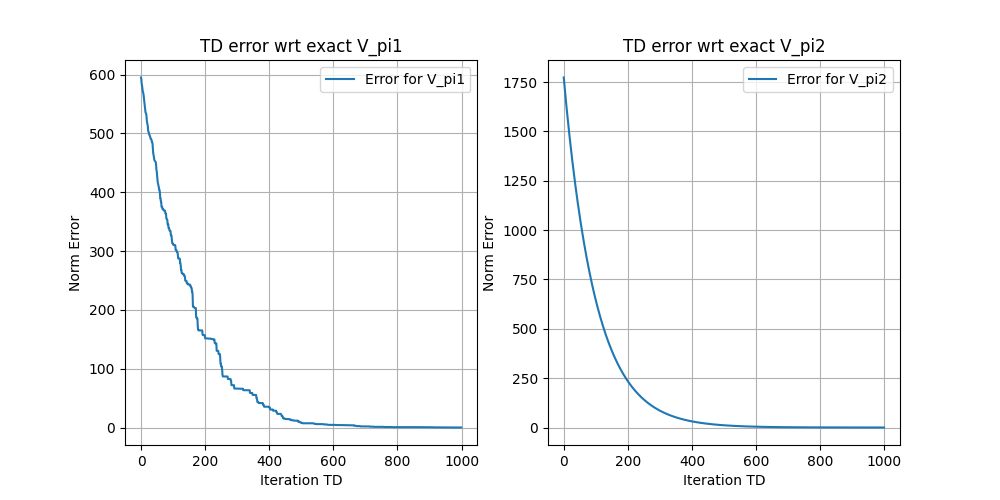

Exact value function for policy 1 is: 
 [ 98.     98.99   99.99  101.    102.02  112.409 113.545 114.692 115.85
 117.02  136.424 137.802 139.194 140.6   142.02  170.045 171.763 173.498
 175.25  177.02 ]
TD Value function for policy 1 is: 
 [ 97.999  98.988  99.988 100.998 102.019 112.393 113.543 114.69  115.848
 117.019 136.414 137.8   139.192 140.598 142.019 169.771 171.761 173.496
 175.248 177.019]
Exact value function for policy 2 is: 
 [362.966 366.632 370.336 374.076 377.855 381.672 385.527 389.421 393.354
 397.328 401.341 405.395 409.49  413.626 417.804 422.025 426.287 430.593
 434.943 439.336]
TD Value function for policy 2 is: 
 [362.949 366.615 370.319 374.059 377.838 381.655 385.51  389.404 393.338
 397.311 401.324 405.378 409.473 413.609 417.787 422.008 426.27  430.576
 434.926 439.319]


In [61]:

# list of evolution of MC
v1_td0_woT_list = td0_woT_algo(matP, matR, mask_pi1, gamma, step_size=0.2, iter=1000, break_traj=100)
v2_td0_woT_list = td0_woT_algo(matP, matR, mask_pi2, gamma, step_size=0.2, iter=1000, break_traj=100)

# plot the results
fig = plt.figure(figsize=(10, 5))
ax1, ax2 = fig.add_subplot(121), fig.add_subplot(122)

ax1.plot(torch.norm(torch.stack(v1_td0_woT_list)-exact_vecV_pi_1,dim=1), label="Error for V_pi1")
ax2.plot(torch.norm(torch.stack(v2_td0_woT_list)-exact_vecV_pi_2,dim=1), label="Error for V_pi2")
ax1.grid()
ax2.grid()

ax1.set_title("TD error wrt exact V_pi1")
ax2.set_title("TD error wrt exact V_pi2")
ax1.set_xlabel("Iteration TD")
ax2.set_xlabel("Iteration TD")
ax1.set_ylabel("Norm Error")
ax2.set_ylabel("Norm Error")
ax1.legend()
ax2.legend()
plt.show()

print("Exact value function for policy 1 is: \n", exact_vecV_pi_1.numpy().squeeze().round(3))
print("TD Value function for policy 1 is: \n", v1_td0_woT_list[-1].numpy().squeeze().round(3))
print("Exact value function for policy 2 is: \n", exact_vecV_pi_2.numpy().squeeze().round(3))
print("TD Value function for policy 2 is: \n", v2_td0_woT_list[-1].numpy().squeeze().round(3))